# Plots of F1 score and SEMSCORE for cloze filling tasks using robert-base and t5 models

In [23]:
#Seeing the top 5 rows of final datafile generated for cloze filling tasks
import pandas as pd
import csv
df= pd.read_csv("/kaggle/input/cloze-score/Cloze_F1_semscore_final.csv")
print(df.shape)
df.head()

(5808, 13)


,Statement,Response,Response by T5,Response by Roberta,F1 T5 by method 1,F1 T5 by method 2,F1 Roberta by method 1,F1 Roberta by method 2,F1 Roberta-T5 by method 1,F1 Roberta-T5 by method 2,Semscore T5,Semscore Roberta,Semscore T5-Roberta
0,Mr. and Mrs. Rabbit and the three [MASK] rabbi...,little,other,other,0.0,0.363636,0.0,0.363636,1.0,1.000000,0.163115,0.163115,1.000000
1,Each [MASK] rabbit had a name .,little,rabbit had a name. Each,individual,0.0,0.206897,0.0,0.250000,0.0,0.242424,0.185938,0.204137,0.183557
2,"Bunny was full of fun , and liked [MASK] play ...",to,to,to,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
3,liked to play with Bunny . He was always ready...,fun,fun,fun,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
4,But Billy was [MASK] . He did not like to work...,lazy,not a good man,different,0.0,0.111111,0.0,0.000000,0.0,0.260870,0.177678,0.194619,0.187448


In [25]:
#initializing the variables for counting exact matches and lists of scores for bar graph plotting.
em_t5=0    #Exact match for model t5
zero_t5=0     #Absolute no match for model t5
em_roberta=0     #Exact match for model roberta
zero_roberta=0    #Absolute no match for model roberta
sem_t5=0        #counter forsemscore>0.9 for t5 model
sem_t5_data=[]   #list of point with semscore less that 0.9 for model t5
sem_roberta=0    #counter forsemscore>0.9 for roberta model
sem_roberta_data=[]     #list of point with semscore less that 0.9 for model roberta
sem_t5_roberta=0
sem_t5_roberta_data=[]

f1_t5_1=[]  #F1 score of model t5 with method 1
f1_t5_2=[]   #F1 score of model t5 with method 2
f1_roberta_1=[]  #F1 score of model roberta with method 1
f1_roberta_2=[]  #F1 score of model roberta with method 2

In [34]:
#Updating the variables initialized in last cell.

for i in range(5808):
    
    if df["F1 T5 by method 1"][i]==df["F1 T5 by method 2"][i]:  #An exact match is when the f1 score by both methods match and are non zero
        em_t5+=1
    else:
        if df["F1 T5 by method 1"][i]==0:  # a zero f1 is  when the f1 score by both methods match and are zero
            zero_t5+=1
        else:
            f1_t5_1.append(df["F1 T5 by method 1"][i])
        f1_t5_2.append(df["F1 T5 by method 2"][i])
        
    if df["F1 Roberta by method 1"][i]==df["F1 Roberta by method 2"][i]: #An exact match is when the f1 score by both methods match and are non zero
        em_roberta+=1
    else:
        if df["F1 Roberta by method 1"][i]==0: # azero f1 is  when the f1 score by both methods match and are zero
            zero_roberta+=1
        else:
            f1_t5_1.append(df["F1 Roberta by method 1"][i])
        f1_roberta_2.append(df["F1 Roberta by method 2"][i])
                            
    if (df["Semscore T5"][i]>0.9):
        sem_t5+=1
    else:
        sem_t5_data.append(df["Semscore T5"][i])
        
    if (df["Semscore Roberta"][i]>0.9):
        sem_roberta+=1
    else:
        sem_roberta_data.append(df["Semscore Roberta"][i])
        
    if (df["Semscore T5-Roberta"][i]>0.9):
        sem_t5_roberta+=1
    else:
        sem_t5_roberta_data.append(df["Semscore T5-Roberta"][i])
                            

In [35]:
#Updating exact matches with alternate method to get cross validation
em_t5,em_roberta= df.loc[df['F1 T5 by method 1']==1]['F1 T5 by method 1'].count() , df.loc[df['F1 Roberta by method 1']==1]['F1 Roberta by method 1'].count()
em_t5,em_roberta

(1841, 2510)

In [36]:
df.loc[df['F1 T5 by method 1']==1]['F1 T5 by method 1'].count()

1841

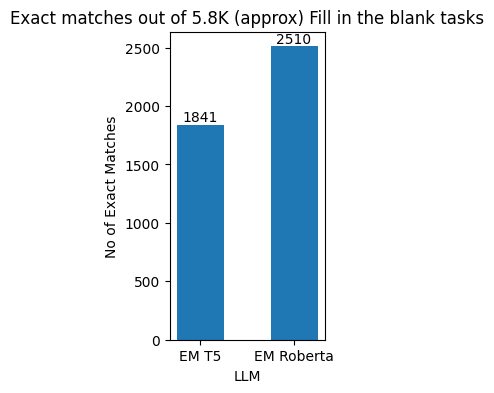

EM T5: 1841
EM Roberta: 2510


In [37]:
import matplotlib.pyplot as plt

categories = ['EM T5', 'EM Roberta']
values = [em_t5, em_roberta]
plt.figure(figsize=(2, 4))  # Adjust the figure size as needed

# Plotting the bar graph
bars = plt.bar(categories, values, width=0.5)

# Adding labels and title
plt.xlabel('LLM')
plt.ylabel('No of Exact Matches')
plt.title('Exact matches out of 5.8K (approx) Fill in the blank tasks')

# Writing values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Showing the plot
plt.show()

print("EM T5:", em_t5)
print("EM Roberta:", em_roberta)


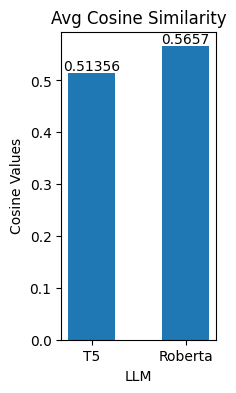

Values: [0.51356, 0.5657]


In [38]:
import matplotlib.pyplot as plt

categories = ['T5', 'Roberta']
values = [0.51356, 0.5657]
plt.figure(figsize=(2, 4))  # Adjust the figure size as needed

# Plotting the bar graph
bars = plt.bar(categories, values, width=0.5)

# Adding labels and title
plt.xlabel('LLM')
plt.ylabel('Cosine Values')
plt.title('Avg Cosine Similarity')

# Writing values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Showing the plot
plt.show()

# Print the values
print("Values:", values)


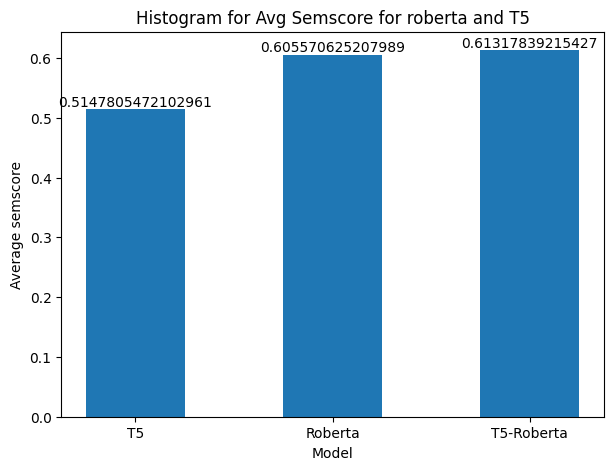

Values: 0.5147805472102961 0.605570625207989 0.61317839215427


In [39]:
import matplotlib.pyplot as plt

# Calculate values
sem_t5, sem_roberta, sem_t5_roberta = df['Semscore T5'].mean(), df['Semscore Roberta'].mean(), df['Semscore T5-Roberta'].mean()

categories = ['T5', 'Roberta', 'T5-Roberta']
values = [sem_t5, sem_roberta, sem_t5_roberta]
plt.figure(figsize=(7, 5))  # Adjust the figure size as needed

# Plotting the bar graph
bars = plt.bar(categories, values, width=0.5)

# Writing values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Average semscore')
plt.title('Histogram for Avg Semscore for roberta and T5')

# Showing the plot
plt.show()

# Print the values
print("Values:", sem_t5, sem_roberta, sem_t5_roberta)